In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ts=pd.read_csv(r"C:\Users\HP\Downloads\5 - Logistic Regression Titanic Survival\ML Project - Logistic Regression Titanic Survival U16955478860.csv")

In [3]:
ts.head(22)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
ts.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
(ts.isnull().mean())*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
ts

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
#Fill Null Value using random 
def random_chose(ts, column):
    non_missing_value = ts[column].dropna()
    t=ts[column] = ts[column].apply(
        lambda x: np.random.choice(non_missing_value) if pd.isnull(x) else x
    )

random_chose(ts, "Age")

random_chose(ts, "Cabin")

random_chose(ts, "Embarked")

In [56]:
#ts['Age'].apply(lambda x: np.random.choice(ts['Age'].dropna()) if pd.isnull(x) else x)
#other short way

In [59]:
ts["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

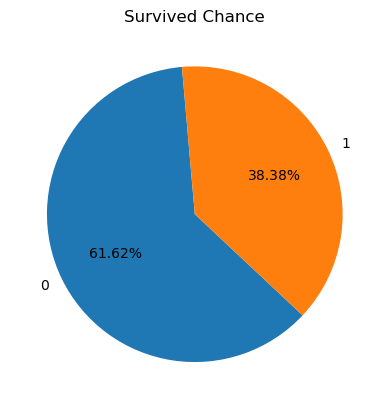

In [61]:
size=[549,342]
labels=[0,1]

plt.pie(x=size,labels=labels,startangle=95,autopct="%0.2f%%")
plt.title("Survived Chance")
plt.show()

In [62]:
ts["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

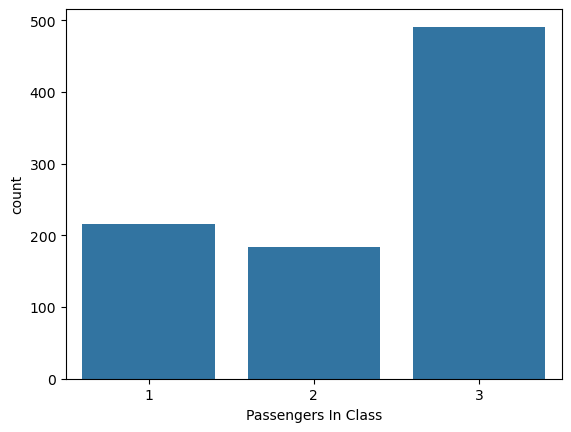

In [63]:
#passenger are in class 1 & 2& 3
sns.countplot(data=ts,x="Pclass")
plt.xlabel("Passengers In Class")
plt.show()

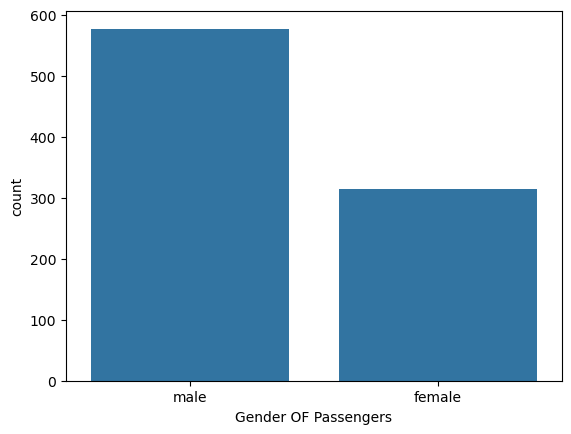

In [64]:
# Gender OF Passengers
sns.countplot(data=ts,x="Sex")
plt.xlabel("Gender OF Passengers")
plt.show()

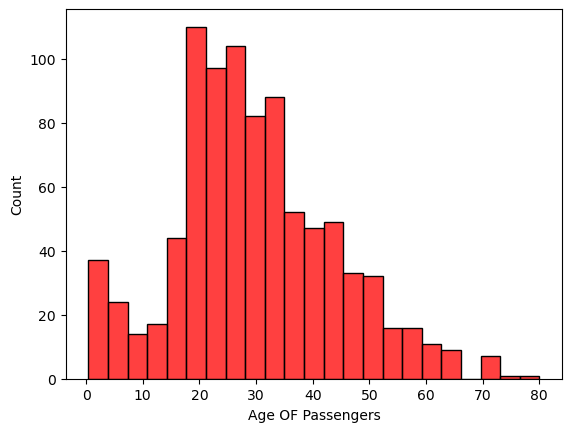

In [67]:
# age of passengers
sns.histplot(data=ts,x="Age",color="r")
plt.xlabel("Age OF Passengers")
plt.show()

In [68]:
ts["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

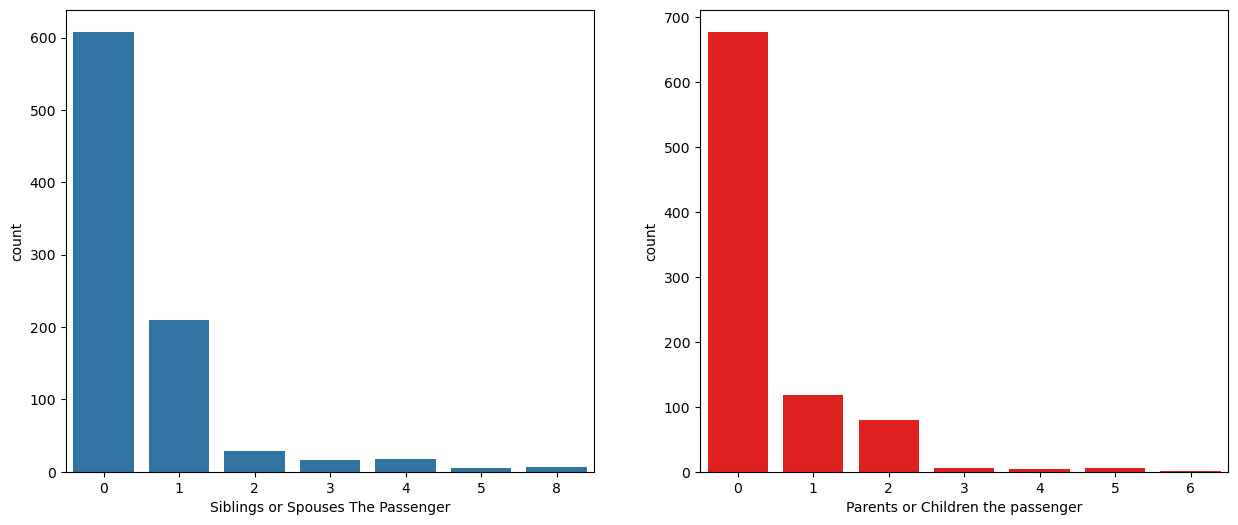

In [70]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(data=ts,x="SibSp")
plt.xlabel("Siblings or Spouses The Passenger")

plt.subplot(1,2,2)
sns.countplot(data=ts,x="Parch",color="r")
plt.xlabel("Parents or Children the passenger")

plt.show()

In [71]:
ts.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C148,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C65,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


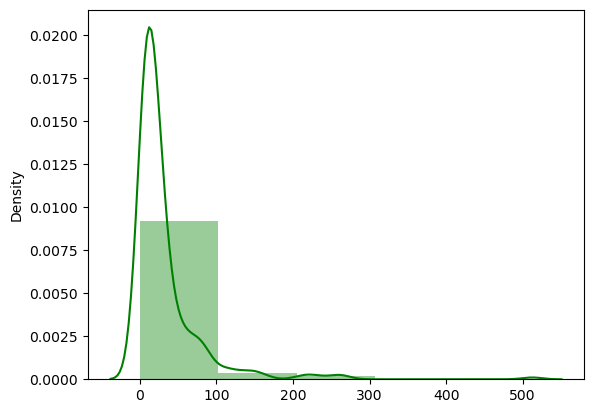

In [72]:
sns.distplot(x=ts["Fare"],bins=5,color="g")
plt.show()

In [74]:
ts["Embarked"].value_counts()

Embarked
S    645
C    169
Q     77
Name: count, dtype: int64

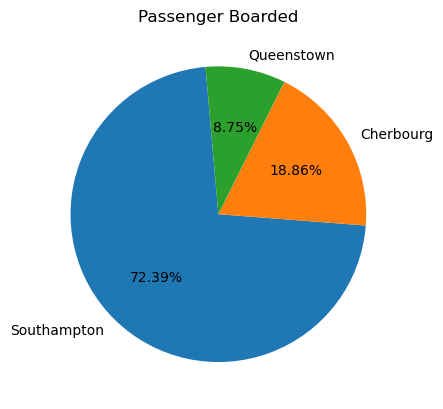

In [75]:
size=[645,168,78]
labels=["Southampton","Cherbourg","Queenstown"]

plt.pie(x=size,labels=labels,startangle=95,autopct="%0.2f%%")
plt.title("Passenger Boarded")
plt.show()

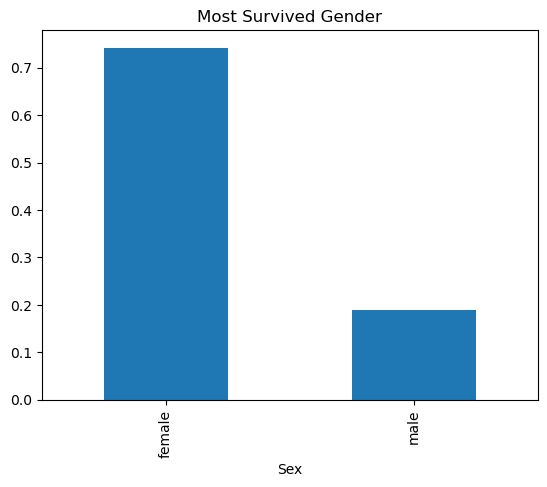

In [76]:
# feamalmore survived compared to male 

ts.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.title("Most Survived Gender")
plt.show()

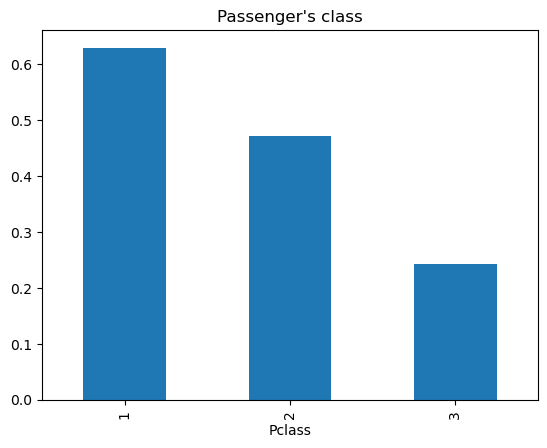

In [77]:
ts.groupby("Pclass")["Survived"].mean().plot(kind="bar")
plt.title("Passenger's class")
plt.show()

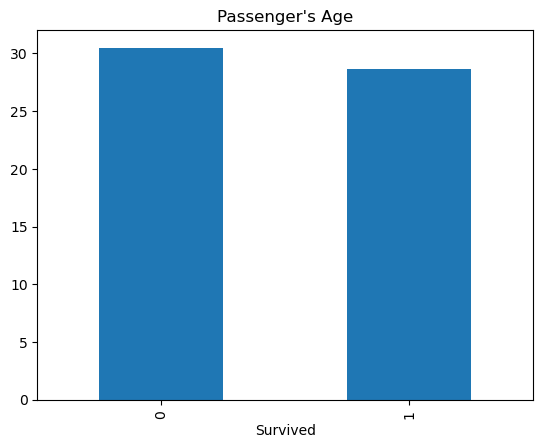

In [78]:
#Survived base on age

ts.groupby("Survived")["Age"].mean().plot(kind="bar")
plt.title("Passenger's Age")
plt.show()

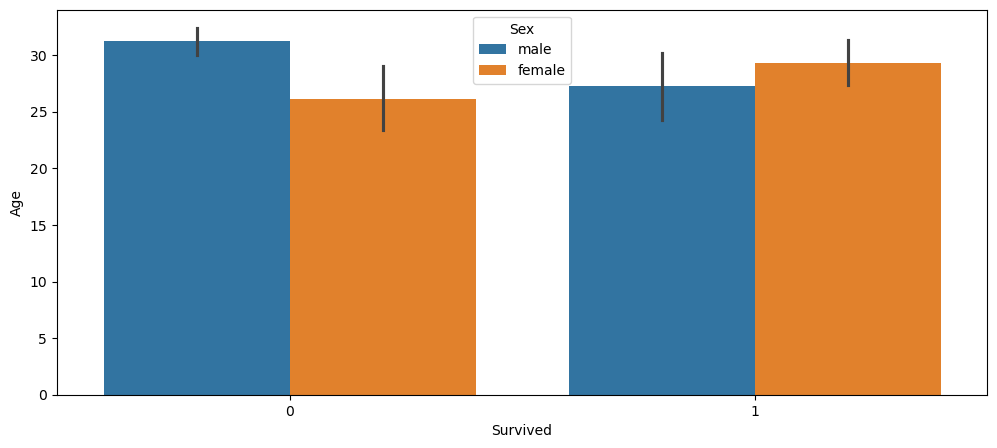

In [79]:
#Survived base on age
plt.figure(figsize=[12,5])
sns.barplot(data=ts,x="Survived",y="Age",hue="Sex")
plt.show()

In [80]:
ts.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C148,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C65,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


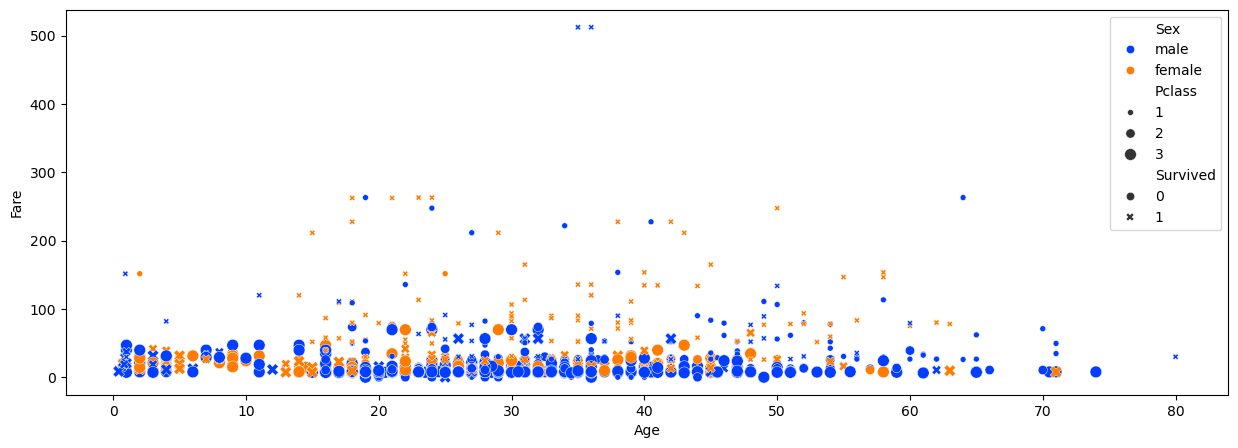

In [84]:
#graph to explain to which gender majority Survived and that gender which class belong

plt.figure(figsize=[15,5])
sns.scatterplot(data=ts,x="Age",y="Fare",hue="Sex",style="Survived",size="Pclass",palette="bright")
plt.show()

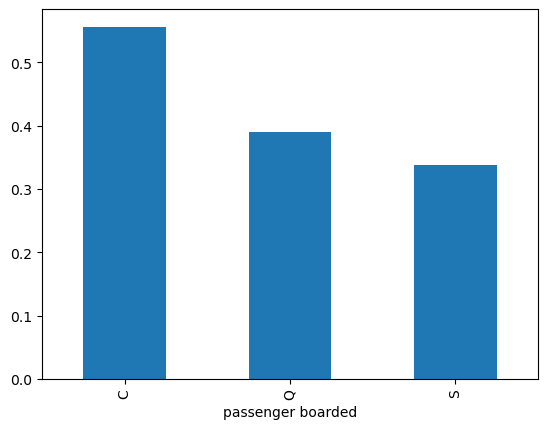

In [85]:
# The port where the passenger boarded the Titanic
ts.groupby("Embarked")["Survived"].mean().plot(kind="bar")
plt.xlabel("passenger boarded")
plt.show()

In [86]:
ts.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C148,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C65,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [89]:
ts["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

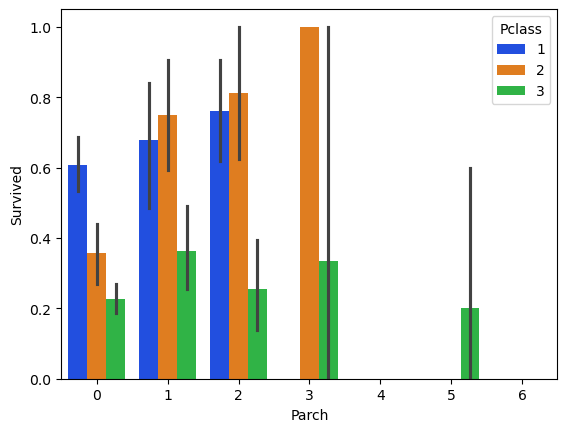

In [90]:
#parents or children the passenger survived status
sns.barplot(data=ts,x="Parch",y="Survived",hue="Pclass",palette="bright")
plt.show()

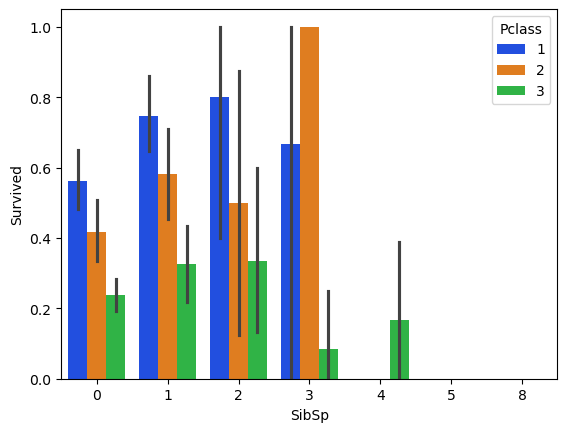

In [91]:
#siblings or spouses the passenger survived status
sns.barplot(data=ts,x="SibSp",y="Survived",hue="Pclass",palette="bright")
plt.show()

In [92]:
# survived perople detailed 
ts[ts["Survived"]==1][["Name","Pclass","Embarked","Fare","SibSp","Parch"]]

,Name,Pclass,Embarked,Fare,SibSp,Parch
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,C,71.2833,1,0
2,"Heikkinen, Miss. Laina",3,S,7.9250,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,S,53.1000,1,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3,S,11.1333,0,2
9,"Nasser, Mrs. Nicholas (Adele Achem)",2,C,30.0708,1,0
...,...,...,...,...,...,...
875,"Najib, Miss. Adele Kiamie ""Jane""",3,C,7.2250,0,0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,C,83.1583,0,1
880,"Shelley, Mrs. William (Imanita Parrish Hall)",2,S,26.0000,0,1
887,"Graham, Miss. Margaret Edith",1,S,30.0000,0,0


In [94]:
# survived only those are in class 3
ts[(ts["Pclass"]==3) & (ts["Survived"]==1)][["Sex","SibSp","Parch","Name"]]

,Sex,SibSp,Parch,Name
2,female,0,0,"Heikkinen, Miss. Laina"
8,female,0,2,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
10,female,1,1,"Sandstrom, Miss. Marguerite Rut"
19,female,0,0,"Masselmani, Mrs. Fatima"
22,female,0,0,"McGowan, Miss. Anna ""Annie"""
...,...,...,...,...
838,male,0,0,"Chip, Mr. Chang"
855,female,0,1,"Aks, Mrs. Sam (Leah Rosen)"
858,female,0,3,"Baclini, Mrs. Solomon (Latifa Qurban)"
869,male,1,1,"Johnson, Master. Harold Theodor"


In [96]:
ts.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C148,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C65,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [97]:
# those people who pay ticket price more then 500 they are survived
ts[(ts["Fare"]>=500)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B37,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [99]:
ts.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C148,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C65,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [100]:
ts.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [101]:
ts

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,22.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [104]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(drop='first',sparse_output=False)

sex=ohe.fit_transform(ts[["Sex"]])

new_sex=pd.DataFrame(sex,columns=ohe.get_feature_names_out(["Sex"]))

In [128]:
ts1=pd.concat([ts,new_sex],axis=1)

In [130]:
ts1.rename({"Sex_male":"New_Sex"},axis=1,inplace=True)

In [132]:
ts1.drop("Sex",axis=1,inplace=True)

In [134]:
ts1

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,New_Sex
0,0,3,22.0,1,0,7.2500,S,1.0
1,1,1,38.0,1,0,71.2833,C,0.0
2,1,3,26.0,0,0,7.9250,S,0.0
3,1,1,35.0,1,0,53.1000,S,0.0
4,0,3,35.0,0,0,8.0500,S,1.0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1.0
887,1,1,19.0,0,0,30.0000,S,0.0
888,0,3,22.0,1,2,23.4500,S,0.0
889,1,1,26.0,0,0,30.0000,C,1.0


In [136]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(drop='first',sparse_output=False)

Embarked=ohe.fit_transform(ts1[["Embarked"]])

new_Embarked=pd.DataFrame(Embarked,columns=ohe.get_feature_names_out(["Embarked"]))

In [138]:
ts2=pd.concat([ts1,new_Embarked],axis=1)

In [140]:
ts2.drop("Embarked",axis=1,inplace=True)

In [142]:
ts2

,Survived,Pclass,Age,SibSp,Parch,Fare,New_Sex,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,0.0,0.0,1.0
888,0,3,22.0,1,2,23.4500,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,1.0,0.0,0.0


In [144]:
x=ts2.drop("Survived",axis=1)

In [146]:
y=ts2["Survived"]

In [149]:
from sklearn.model_selection import train_test_split

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [153]:
from sklearn.preprocessing import StandardScaler

In [155]:
ss=StandardScaler()

In [157]:
sacling_train=ss.fit_transform(x_train)

In [159]:
sacling_test=ss.fit_transform(x_test)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold

In [161]:
k=KFold(n_splits=5)

In [162]:
list=[LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier]

In [163]:
for i in list:
    model=i()
    print(model)
    print(cross_val_score(model,x_train,y_train,cv=k).mean())



LogisticRegression()
0.7992219048557077
SVC()
0.6784201713779179
DecisionTreeClassifier()
0.7640598837781937
RandomForestClassifier()
0.7893332020092585
KNeighborsClassifier()
0.6615680094553333


In [164]:
for i in list:
    model=i()
    print(model)
    print(cross_val_score(model,sacling_train,y_train,cv=k).mean())

LogisticRegression()
0.7992022062444597
SVC()
0.8160248202501723
DecisionTreeClassifier()
0.7626514330739682
RandomForestClassifier()
0.7907219541022359
KNeighborsClassifier()
0.8047670639219936


# LogisticRegression

In [170]:
from sklearn.linear_model import LogisticRegression


In [213]:
lr=LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

In [215]:
lr.fit(sacling_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [217]:
lr.score(sacling_train,y_train)

0.7991573033707865

In [218]:
lr.score(sacling_test,y_test)

0.776536312849162

In [221]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [222]:
accuracy_score(y_test,lr.predict(sacling_test))

0.776536312849162

In [225]:
confusion_matrix(y_test,lr.predict(sacling_test))

array([[94, 14],
       [26, 45]], dtype=int64)

<Axes: >

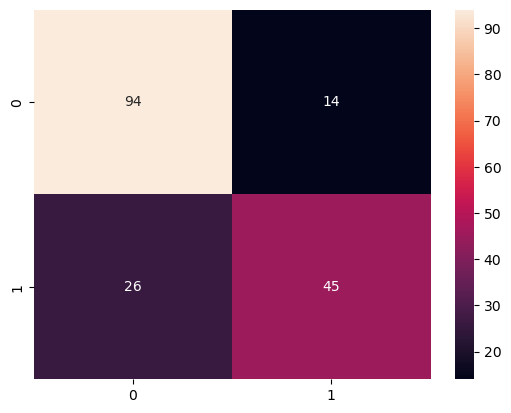

In [227]:
sns.heatmap(confusion_matrix(y_test,lr.predict(sacling_test)),annot=True)

In [228]:
print(classification_report(y_test,lr.predict(sacling_test)))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       108
           1       0.76      0.63      0.69        71

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179



# SVC

In [231]:
from sklearn.svm import SVC

In [539]:
s=SVC()

In [541]:
s.fit(sacling_train,y_train)

SVC()

In [543]:
s.score(sacling_train,y_train)

0.8455056179775281

In [544]:
s.score(sacling_test,y_test)

0.8044692737430168

In [547]:
accuracy_score(y_test,s.predict(sacling_test))

0.8044692737430168

In [549]:
confusion_matrix(y_test,s.predict(sacling_test))

array([[95, 13],
       [22, 49]], dtype=int64)

<Axes: >

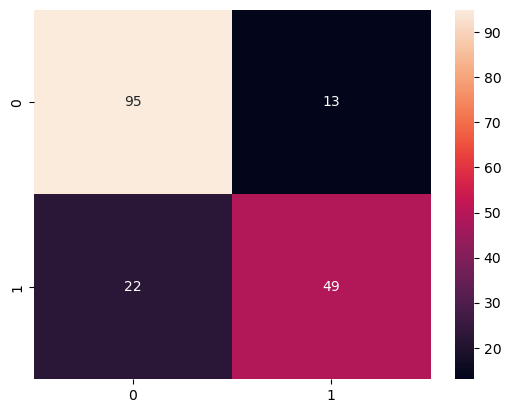

In [551]:
sns.heatmap(confusion_matrix(y_test,s.predict(sacling_test)),annot=True)

In [553]:
print(classification_report(y_test,s.predict(sacling_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       108
           1       0.79      0.69      0.74        71

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



# KNeighborsClassifier

In [784]:
knn=KNeighborsClassifier(n_neighbors=8)

In [785]:
knn.fit(sacling_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [786]:
knn.score(sacling_train,y_train)

0.8441011235955056

In [787]:
knn.score(sacling_test,y_test)

0.7932960893854749

In [789]:
accuracy =[]

for i in range(1,21):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(sacling_train,y_train)
    accuracy.append(model.score(sacling_test,y_test))

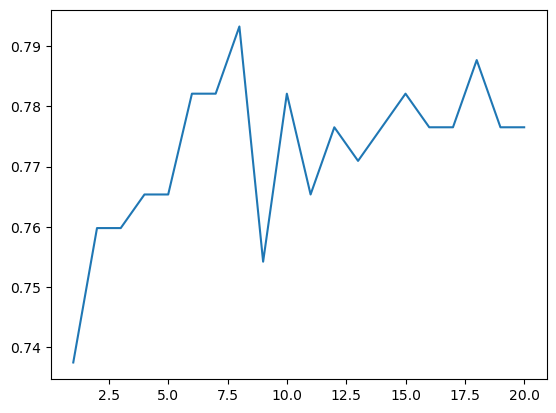

In [730]:
plt.plot(range(1,21),accuracy)